In [1]:
%matplotlib inline

In [2]:
import numpy
import matplotlib.pyplot as plt

To make a 2-dimensional array in numpy, you can do several things.  you can declare individual points

In [3]:
p1 = 0,0
p2 = 1,0
p3 = 1,1
p4 = 0,1
points0 = numpy.array([p1,p2,p3,p4])
points0

array([[0, 0],
       [1, 0],
       [1, 1],
       [0, 1]])

or use nested lists directly:

In [4]:
points =numpy.array([[0,0],[1,0],[1,1],[0,1]])
points

array([[0, 0],
       [1, 0],
       [1, 1],
       [0, 1]])

Once created you can get access to all the data via slicing.  You can index along the rows to extract individual x,y points, or slice along the columns to extract all the x or y values for all points.  First, we'll extract point 1:

In [5]:
p1 = points[0,:]
p1

array([0, 0])

slice points along the columns(2nd dimension) in order to extract the x and y points.  The 0th index is x, and the 1st index is y in the matrix's columns(the second array dimension)

In [6]:
x = points[:,0]
x

array([0, 1, 1, 0])

In [7]:
y = points[:,1]
y

array([0, 0, 1, 1])

In matlab, you might use a command like the following to plot the data:

This looks very similar in python+matplotlib

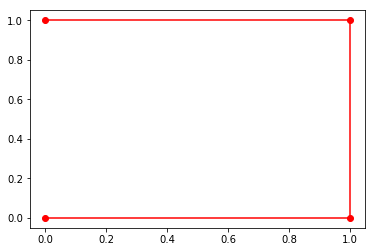

In [8]:
plt.plot(x,y,'ro-')

but this did not draw a line back to the first point.  In that case, I will be doing some advanced indexing by providing a list of points I want matplotlib to draw, in the x, and y directions respectively.  I don't need to recreate x and y like I did in the last example, I can just use points directly.

In [9]:
plt.plot(points[(0,1,2,3,0),0],points[(0,1,2,3,0),1],'ro-')

so you can see that I indexed through the 0th, 1st, 2nd, 3rd, and 0th point in order to close the loop in my drawing

## scipy.optimize

The scipy package provides a lot of useful functions, including a subpackage for optimization.  The minimize function([scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)) permits you to find a solution to a nonlinear problem by minimizing the error associated with a function.  The function's job is to describe the solution you are looking for.  In our case, we want to create a function that minimizes the error associated with constraint equations which describe our desired kinematics.

In [10]:
import scipy.optimize

slice it
concatenate arrays
find values which match
make a constraint equation
do linear algebra with it
use scipy.optimize
use scipy optimize on multiple equations
plot resulting kinematics
Make a custom class
store data in it
access data in it
initialize it with data
explain "self"
overload a function

In [11]:
a = numpy.array([2,1])
b= numpy.array([1,0])

a.dot(b)

2

In [12]:
def length(v):
    length_squared = v.dot(v)
    length = length_squared**(.5)
    return length

In [13]:
length(a)

2.2360679774997898

In [14]:
import math

In [15]:
def inner_angle(v1,v2):
    costheta = v1.dot(v2)/(length(v1)*length(v2))
    theta = math.acos(costheta)
    return theta

    

In [16]:
ini = 0,0,1,0,1,1,0,1

In [17]:
def calc_fourbar(variables):
    x1,y1,x2,y2,x3,y3,x4,y4 = variables
    p1 = numpy.array([x1,y1])
    p2 = numpy.array([x2,y2])
    p3 = numpy.array([x3,y3])
    p4 = numpy.array([x4,y4])

    v1  =p2-p1
    v2 = p3-p2
    v3 = p4-p3
    v4 = p1-p4

    x_axis = numpy.array([1,0])

    l1 = length(v1)
    l2 = length(v2)
    l3 = length(v3)
    l4 = length(v4)

    error = []
    error.append([l1-1])
    error.append([l2-2])
    error.append([l3-3])
    error.append([l4-1])
    error.append([inner_angle(v1,-v4)-90*math.pi/180])
    error.append([x1-1])
    error.append([y1-1])
    error.append([inner_angle(v1,x_axis)-0])

    error1 =numpy.array(error)
    error1 = error1.flatten()
    return length(error1)
calc_fourbar((0,0,1,0,1,1,0,1))

2.6457513110645907

In [18]:
def gen_function(q1):

    def calc_fourbar(variables):
        x1,y1,x2,y2,x3,y3,x4,y4 = variables
        p1 = numpy.array([x1,y1])
        p2 = numpy.array([x2,y2])
        p3 = numpy.array([x3,y3])
        p4 = numpy.array([x4,y4])

        v1  =p2-p1
        v2 = p3-p2
        v3 = p4-p3
        v4 = p1-p4

        x_axis = numpy.array([1,0])

        l1 = length(v1)
        l2 = length(v2)
        l3 = length(v3)
        l4 = length(v4)

        error = []
        error.append([l1-1])
        error.append([l2-2])
        error.append([l3-3])
        error.append([l4-1])
        error.append([inner_angle(v1,-v4)-q1*math.pi/180])
        error.append([x1-1])
        error.append([y1-1])
        error.append([inner_angle(v1,x_axis)-0])

        error1 =numpy.array(error)
        error1 = error1.flatten()
        return length(error1)
    
    return calc_fourbar
calc_fourbar = gen_function(80)


In [19]:
calc_fourbar(ini)

2.6515017899256019

In [20]:
result  = scipy.optimize.minimize(calc_fourbar,ini)

In [21]:
result.x


array([ 0.99999996,  0.99999995,  1.99999992,  0.99999994,  3.9998858 ,
        0.97863635,  1.17364814,  1.9848077 ])

In [22]:
result.fun

8.108831010205018e-08

In [23]:
calc_fourbar(result.x)

8.1088310102050176e-08

In [24]:
points = result.x


In [25]:

points =points.reshape((4,2))

In [26]:
points

array([[ 0.99999996,  0.99999995],
       [ 1.99999992,  0.99999994],
       [ 3.9998858 ,  0.97863635],
       [ 1.17364814,  1.9848077 ]])

(0.8500056648524722,
 4.1498800905809201,
 0.92832778733479993,
 2.0351162629552553)

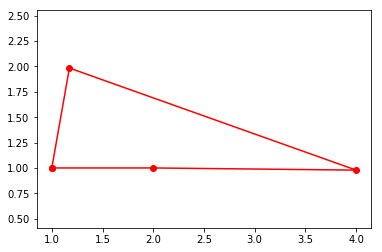

In [27]:
plt.plot(points[(0,1,2,3,0),0],points[(0,1,2,3,0),1],'ro-')
plt.axis('equal')

7.055671370621681e-08
6.52879870272e-08
9.332162237633878e-08
6.428598401922671e-08
8.581095594626669e-08
8.216707436028662e-08
6.863653844579e-08
8.761234290652031e-08
1.0062835704053867e-07
8.30716370963e-08


(-0.18403144634292831,
 4.19888863823879,
 0.23931788183207248,
 3.0823592719434405)

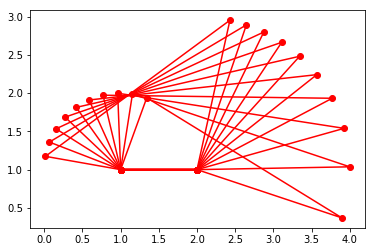

In [44]:
ini = 0,0,1,0,1,1,0,1
f = plt.figure()
a = f.add_subplot(111)
for q1 in numpy.r_[70:170:10j]:
    function=gen_function(q1)
    result  = scipy.optimize.minimize(function,ini)
    points = result.x
    points =points.reshape((4,2))
    a.plot(points[(0,1,2,3,0),0],points[(0,1,2,3,0),1],'ro-')
    print(result.fun)
    ini = result.x
plt.axis('equal')

In [ ]:
f.add_subplot